In [1]:
import pandas as pd 
import numpy as np
from  datetime import datetime
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('ggplot')
from itertools import cycle, islice

%matplotlib inline

In [2]:
train =  pd.read_excel('train.xlsx')

In [3]:
reqd = ['ID', 'Salary','DOJ','Designation','10board','12board','Specialization','JobCity','Gender','DOB','10percentage','12percentage','collegeGPA','Degree','CollegeTier','CollegeState','GraduationYear']

In [4]:
data = pd.DataFrame()

In [5]:
for field in reqd:
    data[field] = train[field]
data['Delay'] = data['DOJ'] - data['DOB']
data['Delay'] = data['Delay'].astype('timedelta64[D]')

In [7]:
data.corr(method='pearson', min_periods=1)

,ID,Salary,10percentage,12percentage,collegeGPA,CollegeTier,GraduationYear,Delay
ID,1.000000,-0.247294,0.044547,0.007069,0.047144,0.035160,0.027539,-0.127438
Salary,-0.247294,1.000000,0.177373,0.170254,0.130103,-0.179332,-0.010053,-0.021053
10percentage,0.044547,0.177373,1.000000,0.643378,0.312538,-0.126042,-0.013799,-0.257414
12percentage,0.007069,0.170254,0.643378,1.000000,0.346137,-0.100771,-0.012933,-0.326404
collegeGPA,0.047144,0.130103,0.312538,0.346137,1.000000,-0.086781,0.008706,-0.113108
CollegeTier,0.035160,-0.179332,-0.126042,-0.100771,-0.086781,1.000000,-0.005557,-0.028802
GraduationYear,0.027539,-0.010053,-0.013799,-0.012933,0.008706,-0.005557,1.000000,-0.007958
Delay,-0.127438,-0.021053,-0.257414,-0.326404,-0.113108,-0.028802,-0.007958,1.000000


In [95]:
dataAcad  = pd.DataFrame()
reqd =  ['Salary','10percentage', '12percentage', 'collegeGPA']
for field in reqd:
    dataAcad[field]  = data[field]
dataAcad.corr(method='pearson', min_periods=1)

,Salary,10percentage,12percentage,collegeGPA
Salary,1.000000,0.177373,0.170254,0.130103
10percentage,0.177373,1.000000,0.643378,0.312538
12percentage,0.170254,0.643378,1.000000,0.346137
collegeGPA,0.130103,0.312538,0.346137,1.000000


In [96]:
data.shape

(3998, 19)

In [9]:
stateData = pd.DataFrame()
stateData['Salary'] = data['Salary']
stateData['CollegeState'] = data['CollegeState']
stateData['CollegeTier'] = data['CollegeTier']

stateTierAvg = stateData.groupby(['CollegeState','CollegeTier']).mean()

In [10]:
print(np.max(stateTierAvg))
stateTierAvg

Salary    794000
dtype: int64


Salary
CollegeState      CollegeTier        
Andhra Pradesh    1            320000
                  2            324508
Assam             1            533333
                  2            330000
Bihar             1            410000
                  2            164000
Chhattisgarh      1            327500
                  2            250217
Delhi             1            383954
                  2            319230
Goa               2            450000
Gujarat           1            455000
                  2            309545
Haryana           1            361333
                  2            294333
Himachal Pradesh  1            340000
                  2            313750
Jammu and Kashmir 1            477500
                  2            364000
Jharkhand         1            563571
                  2            451190
Karnataka         1            426111
                  2            321772
Kerala            1            395000
                  2            266333
Madhya Pradesh    1            500937
                  2            315433
Maharashtra       1            530000
                  2            291533
Meghalaya         2            537500
Orissa            1            385714
                  2            307000
Punjab            1            492833
                  2            270030
Rajasthan         1            794000
                  2            290701
Sikkim            2            360000
Tamil Nadu        1            343000
                  2            279834
Telangana         1            338888
                  2            299225
Union Territory   2            186000
Uttar Pradesh     1            505161
                  2            291735
Uttarakhand       1            600000
                  2            285607
West Bengal       1            422857
                  2            272777

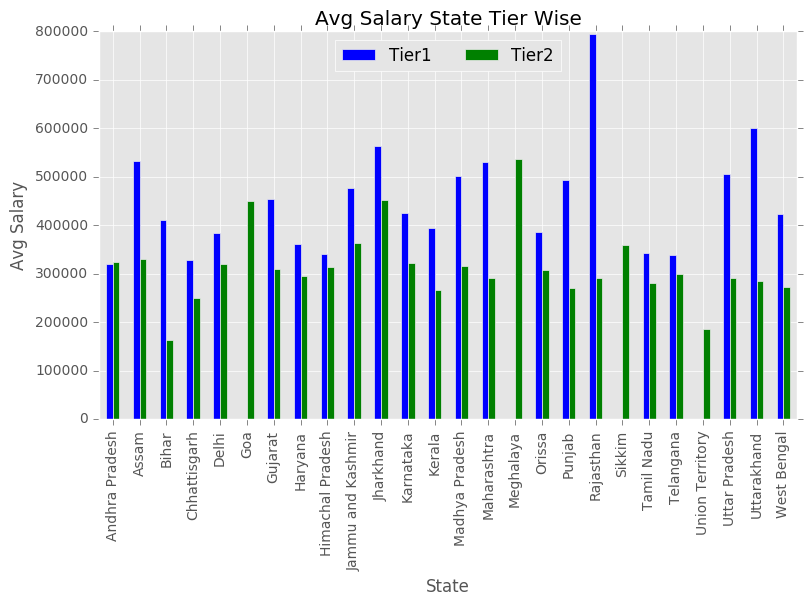

In [11]:
plt2 = stateTierAvg.sort_values(by=['Salary'],ascending=True)
plt = plt2.unstack().plot(kind='bar', title="Avg Salary State Tier Wise", figsize =(9,5))

#plt = stateTierAvg.unstack().plot(kind='bar', title="Avg Salary State Tier Wise", figsize =(9,5))
plt.set_xlabel("State")
plt.set_ylabel("Avg Salary")
plt.legend(["Tier1","Tier2"], loc=9,ncol=4)

In [27]:
data['CollegeState'].value_counts()
#data['CollegeTier'].value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Union Territory        5
Assam                  5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

In [48]:
data.loc[((data['CollegeState'] == 'Maharashtra') & (data['CollegeTier'] == 1))]


,ID,Salary,DOJ,Designation,10board,12board,Specialization,JobCity,Gender,DOB,10percentage,12percentage,collegeGPA,Degree,CollegeTier,CollegeState,GraduationYear,Delay,marksAvg
train,879126,350000,2014-09-01,software engineer,maharashtra state board,maharashtra state board,mechatronics,Pune,f,1989-08-22,85.06,76.50,83.50,M.Tech./M.E.,1,Maharashtra,2014,9141,81.686667
train,351307,550000,2012-09-01,software developer,icse,cbse,computer engineering,Pune,m,1990-02-10,80.50,68.40,67.95,B.Tech/B.E.,1,Maharashtra,2012,8239,72.283333
train,351385,305000,2012-12-01,business analyst,ssc,hsc,electronics & telecommunications,Pune,m,1989-09-12,73.33,57.67,55.55,B.Tech/B.E.,1,Maharashtra,2012,8481,62.183333
train,877224,300000,2014-12-01,management trainee,state board,state board,civil engineering,Pune,f,1992-05-10,93.38,78.50,65.70,B.Tech/B.E.,1,Maharashtra,2014,8240,79.193333
train,287647,325000,2012-07-01,graduate engineer,cbse,cbse,computer engineering,Pune,m,1989-04-02,69.60,68.00,70.25,M.Tech./M.E.,1,Maharashtra,2015,8491,69.283333
train,877241,345000,2014-07-01,design engineer,state board,state board,civil engineering,Pune,m,1992-05-10,95.54,90.00,59.00,B.Tech/B.E.,1,Maharashtra,2014,8087,81.513333
train,47667,845000,2010-08-01,senior software engineer,maharashtra state board mumbai divisional board,maharashtra state board mumbai divisional board,information technology,Mumbai,m,1988-05-12,75.46,53.83,56.64,B.Tech/B.E.,1,Maharashtra,2010,8116,61.976667
train,47709,325000,2010-09-01,software engineer,maharashtra state board for ssc,maharashtra state board for hsc,computer engineering,Mumbai,m,1988-10-26,88.00,78.00,54.00,B.Tech/B.E.,1,Maharashtra,2010,7980,73.333333
train,1266498,210000,2014-08-01,management trainee,state board,state board,mechanical engineering,Mumbai,m,1993-04-21,91.53,71.17,60.70,B.Tech/B.E.,1,Maharashtra,2014,7772,74.466667
train,768298,1500000,2015-06-01,software engineer,cbse,cbse,computer engineering,Bangalore,m,1993-08-17,90.20,84.80,66.23,B.Tech/B.E.,1,Maharashtra,2015,7958,80.410000


In [31]:
cityCounts = data['JobCity'].value_counts()
#print(cityCounts)
print(cityCounts['Indore'])

24


In [32]:
jcc = data['JobCity'].value_counts()

In [60]:
data['JobCity'].loc[data['JobCity'] == 'chennai'] = 'Chennai'
data['JobCity'].loc[data['JobCity'] == 'hyderabad'] = 'Hyderabad'
data['JobCity'].loc[data['JobCity'] == 'pune'] = 'Pune'

JobCities = pd.DataFrame()
JobCities['Salary'] = data['Salary']
#JobCities['JobCity'] = data['JobCity']

JobCities['JobCity'] =  data['JobCity'].map(lambda x: x if jcc[x] > 15 else -1)

#JobCities['CollegeTier'] = data['CollegeTier']



In [61]:
JobCities['JobCity'].value_counts()

-1               1117
Bangalore         627
Noida             368
Hyderabad         351
Pune              316
Chennai           299
Gurgaon           198
New Delhi         196
Mumbai            108
Kolkata            98
Jaipur             46
Mysore             36
Lucknow            36
Navi Mumbai        32
Greater Noida      26
Chandigarh         26
Indore             24
Bhubaneswar        22
Coimbatore         20
Faridabad          18
Ahmedabad          17
Bhopal             17
Name: JobCity, dtype: int64

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


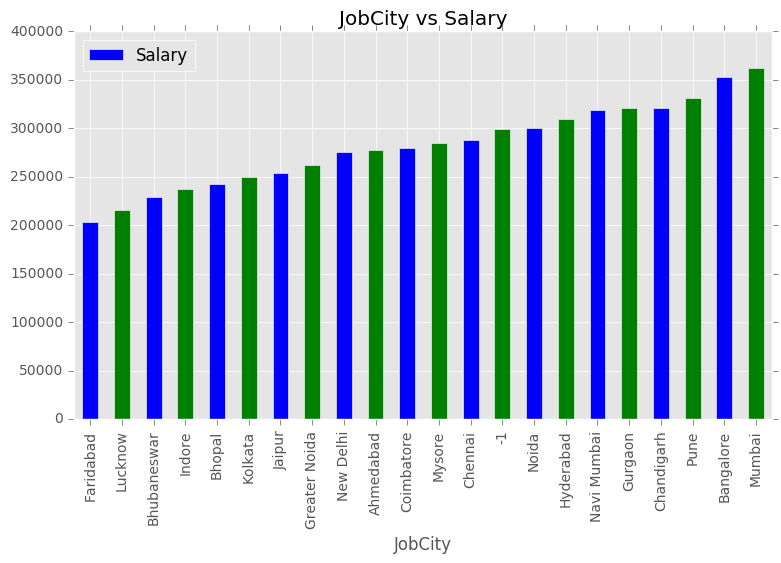

In [62]:
JobCityAvg = JobCities.groupby(['JobCity']).mean()

mycols = list(islice(cycle(['b', 'g']), None, len(JobCityAvg)))
jplt = JobCityAvg.sort(columns='Salary',ascending=True).plot(kind='bar', title = 'JobCity vs Salary',color=mycols,figsize =(9,5))
jplt.xlabel = 'Job City'
jplt.ylabel = 'Salary'


In [64]:
data['JobCity'].loc[data['JobCity'] == 'Bangalore'].shape

(627,)

In [65]:
desigSal = pd.DataFrame()
dsc = data['Designation'].value_counts()
desigSal['DesGroup'] = data['Designation']
desigSal['DesGroup'] = data['Designation'].map(lambda x: x if dsc[x] > 25 else 'other')
desigSal['Salary'] = data['Salary']

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


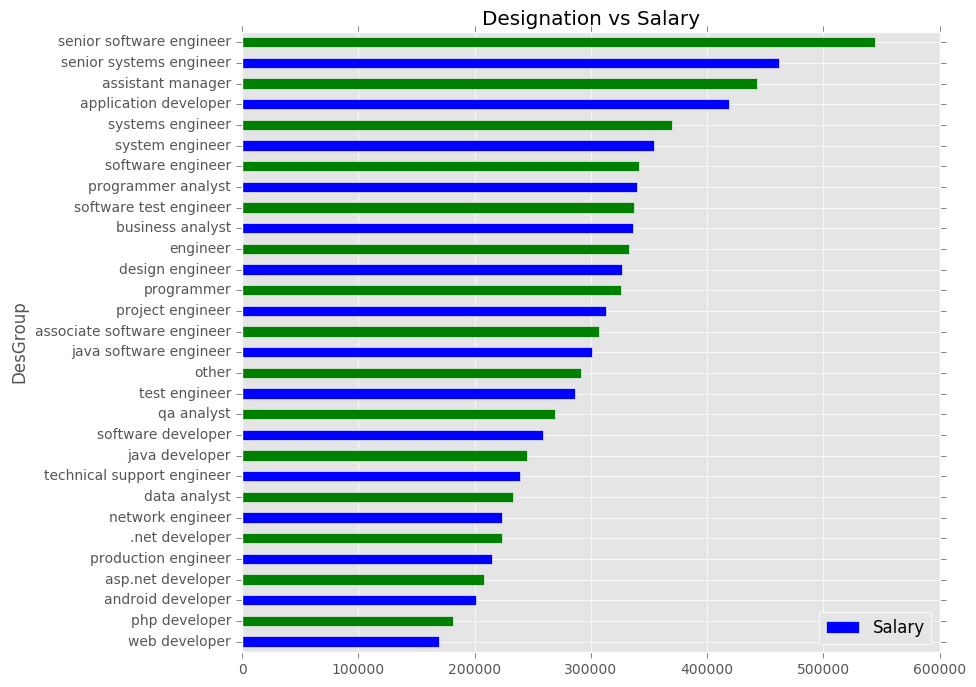

In [66]:
desigSal['DesGroup'].value_counts()
desigSalAvg = desigSal.groupby(['DesGroup']).mean()
mycols = list(islice(cycle(['b', 'g']), None, len(JobCityAvg)))
desigSalAvg.sort(columns='Salary',ascending=True).plot(kind='barh',color = mycols,  title = 'Designation vs Salary', figsize =(9,8))

In [92]:
spcl = pd.DataFrame()
splc = data['Specialization'].value_counts()
spcl['Specialization'] = data['Specialization']
spcl['Specialization'] = data['Specialization'].map(lambda x: x if splc[x] > 13 else 'other')
spcl['Salary'] = data['Salary']

spcl['Specialization'].loc[spcl['Specialization'] == 'electronics and communication engineering'] = 'electronics & telecommunications'
spcl['Specialization'].loc[spcl['Specialization'] == 'computer science & engineering'] = 'computer engineering'
spcl['Specialization'].value_counts()

computer engineering                           1344
electronics & telecommunications               1001
information technology                          660
computer application                            244
mechanical engineering                          201
electronics and electrical engineering          196
other                                           101
electrical engineering                           82
electronics & instrumentation eng                32
civil engineering                                29
information science engineering                  27
electronics and instrumentation engineering      27
instrumentation and control engineering          20
electronics engineering                          19
biotechnology                                    15
Name: Specialization, dtype: int64

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


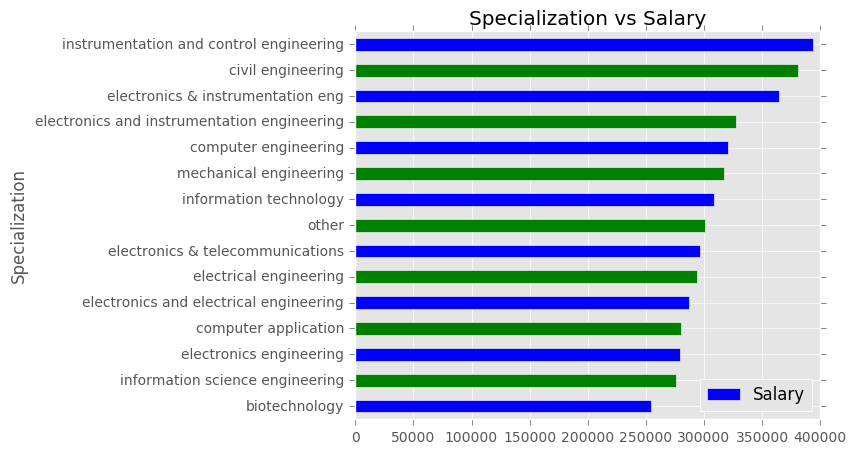

In [94]:
SpclSalAvg = spcl.groupby(['Specialization']).mean()
mycols = list(islice(cycle(['b', 'g']), None, len(SpclSalAvg)))
SpclSalAvg.sort(columns='Salary',ascending=True).plot(kind='barh', color = mycols, title = 'Specialization vs Salary', figsize =(6,5))

In [88]:
spcl.loc[spcl['Specialization'] == '']

,Specialization,Salary
train,computer engineering,420000
train,electronics and communication engineering,500000
train,information technology,325000
train,computer engineering,1100000
train,electronics and communication engineering,200000
train,electronics and communication engineering,300000
train,computer science & engineering,300000
train,mechanical engineering,400000
train,electronics and electrical engineering,600000
train,electronics and communication engineering,230000


In [69]:
data['12board'].loc[data['12board'] == 'up'] = 'up board'
data['12board'].loc[data['12board'] == 'icse'] = 'isc'
data['12board'].value_counts()

cbse                                                                        1400
state board                                                                 1254
0                                                                            359
isc                                                                          174
up board                                                                     107
board of intermediate                                                         36
board of intermediate education                                               31
rbse                                                                          19
mp board                                                                      17
bie                                                                           15
chse                                                                          14
ipe                                                                           14
hsc                         

In [84]:
boardSal = pd.DataFrame()
boardSal['Salary'] = data['Salary']
boardSal['12board'] = data['12board']
bec = boardSal['12board'].value_counts()
boardSal['12board'] = data['12board'].map(lambda x: x if bec[x] > 100 else 'other' ) 
boardSal['12board'].loc[boardSal['12board'] == 0] = 'other'
boardSal['12board'].loc[boardSal['12board'] == 'state board'] = 'other'
boardSal['12board'].loc[boardSal['12board'] == 'central board of secondary education'] = 'cbse'

In [85]:
boardSal['12board'].value_counts()

other       2317
cbse        1400
isc          174
up board     107
Name: 12board, dtype: int64

/home/fsftn/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


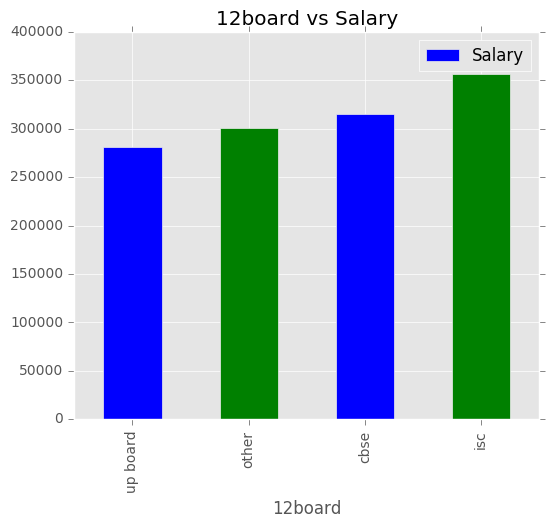

In [86]:
boardSalAvg = boardSal.groupby(['12board']).mean()
mycols = list(islice(cycle(['b', 'g']), None, len(boardSalAvg)))
boardSalAvg.sort(columns='Salary',ascending=True).plot(kind='bar', color = mycols, title = '12board vs Salary', figsize =(6,5))